<h1>China - Heterogeneity and robustness of the Kuznets curve

https://docs.google.com/document/d/1M99QQbTWXdMceAiBRSqCsgX0dTrR9O3X50fAD2F2QrA/edit

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import skew, kurtosis
import arch.unitroot as ur
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from pmdarima import auto_arima


In [20]:
df = pd.read_csv('usa.csv')
df = df.rename(columns={'GDP per capita (current US$) [NY.GDP.PCAP.CD]' : 'gdp', 
                        'CO2 emissions (metric tons per capita) [EN.ATM.CO2E.PC]' : 'co2', 
                        'Gini index [SI.POV.GINI]' : 'gini'})
df = df.replace('..', np.nan).dropna()

cols = ['gdp', 'co2', 'gini']
for col in cols:
    df[col] = pd.to_numeric(df[col])

data_skewness = skew(df)
data_kurtosis = kurtosis(df)
print(f"Skewness: {data_skewness}")
print(f"Kurtosis: {data_kurtosis}")

for col in cols:
    df[col] = np.log(df[col])

df.describe()

Skewness: [ 0.          0.07468265 -0.68541509 -1.27100732]
Kurtosis: [-1.2025     -1.18187087 -0.82025341  1.33496669]


,Time,gdp,co2,gini
count,31.000000,31.000000,31.000000,31.000000
mean,2005.000000,10.627303,2.882594,3.698834
std,9.092121,0.309620,0.122486,0.022156
min,1990.000000,10.081157,2.567471,3.637586
25%,1997.500000,10.378132,2.777328,3.688879
50%,2005.000000,10.694746,2.945641,3.703768
75%,2012.500000,10.869185,2.969793,3.712351
max,2020.000000,11.083993,3.018950,3.725693


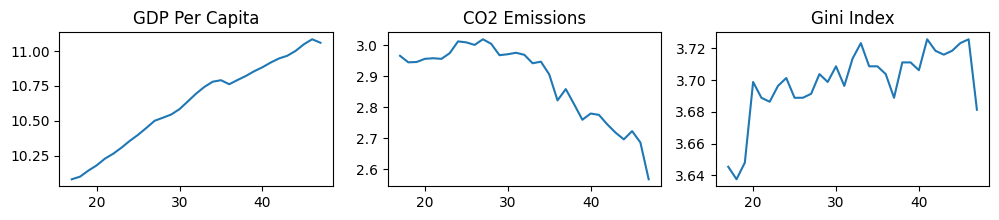

In [21]:
fig, ax = plt.subplots(1, 3, figsize = (12,2))
ax[0].plot(df['gdp'])
ax[0].set_title("GDP Per Capita")
ax[1].plot(df['co2'])
ax[1].set_title("CO2 Emissions")
ax[2].plot(df['gini'])
ax[2].set_title("Gini Index")
plt.show()

<h1>Kuznets Curve

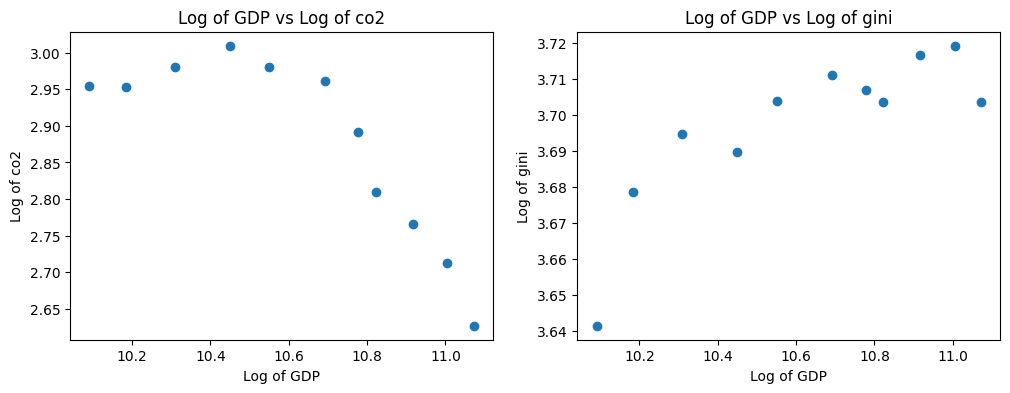

In [22]:
df['year_group'] = df['Time'] // 3 * 3
avr_df = df.groupby('year_group')[['gdp','co2', 'gini']].mean().reset_index()

fig, ax = plt.subplots(1, 2, figsize = (12,4))

ax[0].scatter(avr_df['gdp'], avr_df[cols[1]])
ax[0].set_xlabel('Log of GDP')
ax[0].set_ylabel(f'Log of {cols[1]}')
ax[0].set_title(f'Log of GDP vs Log of {cols[1]}')

ax[1].scatter(avr_df['gdp'], avr_df[cols[2]])
ax[1].set_xlabel('Log of GDP')
ax[1].set_ylabel(f'Log of {cols[2]}')
ax[1].set_title(f'Log of GDP vs Log of {cols[2]}')

plt.show()

<h1>Stationary Test

In [23]:
for col in cols:
    series = df[col].values
    adf_y = ur.ADF(series)
    print(f'\n///////////////////{col}///////////////////////')
    print(adf_y.summary())


///////////////////gdp///////////////////////


c:\Users\frank\AppData\Local\Programs\Python\Python311\Lib\site-packages\arch\unitroot\unitroot.py:785: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self._stat = stat = resols.tvalues[0]


   Augmented Dickey-Fuller Results   
Test Statistic                 -2.144
P-value                         0.227
Lags                                2
-------------------------------------

Trend: Constant
Critical Values: -3.69 (1%), -2.97 (5%), -2.63 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.

///////////////////co2///////////////////////
   Augmented Dickey-Fuller Results   
Test Statistic                  2.252
P-value                         0.999
Lags                                2
-------------------------------------

Trend: Constant
Critical Values: -3.69 (1%), -2.97 (5%), -2.63 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.

///////////////////gini///////////////////////


c:\Users\frank\AppData\Local\Programs\Python\Python311\Lib\site-packages\arch\unitroot\unitroot.py:785: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self._stat = stat = resols.tvalues[0]


   Augmented Dickey-Fuller Results   
Test Statistic                 -2.931
P-value                         0.042
Lags                                0
-------------------------------------

Trend: Constant
Critical Values: -3.67 (1%), -2.96 (5%), -2.62 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


c:\Users\frank\AppData\Local\Programs\Python\Python311\Lib\site-packages\arch\unitroot\unitroot.py:785: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self._stat = stat = resols.tvalues[0]


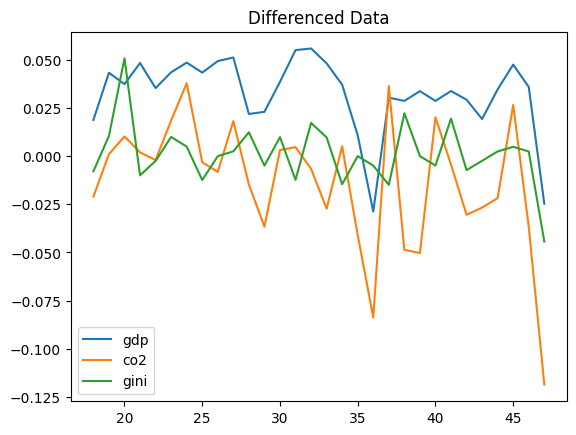

In [24]:
df_diff = df[cols].diff()
df_diff.plot()
plt.title('Differenced Data')
plt.show()

<h1>Differenced Data

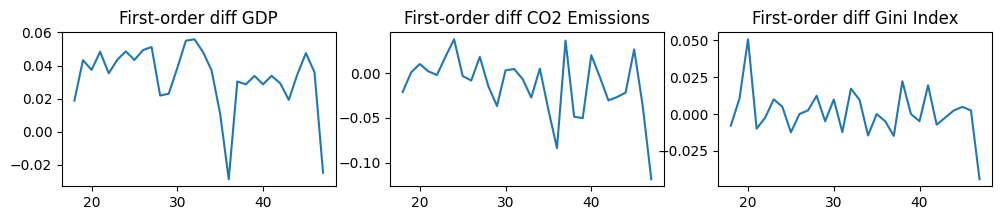

In [25]:
# Perform first-order differencing
df_diff_gdp = df["gdp"].diff(periods=1).dropna()
df_diff_co2 = df["co2"].diff(periods=1).dropna()
df_diff_gini = df["gini"].diff(periods=1).dropna()

fig, ax = plt.subplots(1, 3, figsize = (12,2))
ax[0].plot(df_diff_gdp)
ax[0].set_title("First-order diff GDP")
ax[1].plot(df_diff_co2)
ax[1].set_title("First-order diff CO2 Emissions")
ax[2].plot(df_diff_gini)
ax[2].set_title("First-order diff Gini Index")
plt.show()

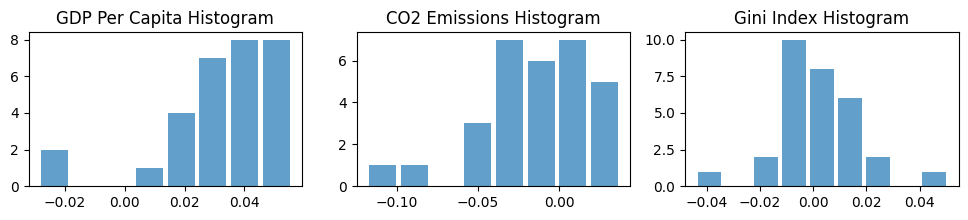

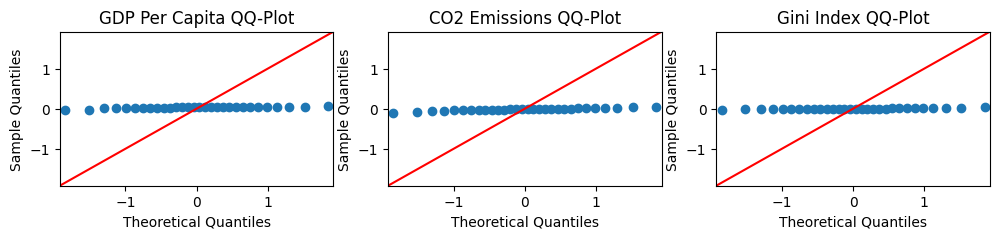

In [26]:
gdp = df_diff_gdp
co2 = df_diff_co2
gini = df_diff_gini

fig, ax = plt.subplots(1, 3, figsize = (12,2))
ax[0].hist(gdp, bins='auto', alpha=0.7, rwidth=0.85)
ax[0].set_title("GDP Per Capita Histogram")
ax[1].hist(co2, bins='auto', alpha=0.7, rwidth=0.85)
ax[1].set_title("CO2 Emissions Histogram")
ax[2].hist(gini, bins='auto', alpha=0.7, rwidth=0.85)
ax[2].set_title("Gini Index Histogram")
plt.show()

fig, ax = plt.subplots(1, 3, figsize = (12,2))
sm.qqplot(gdp, line='45', ax=ax[0])
ax[0].set_title("GDP Per Capita QQ-Plot")
sm.qqplot(co2, line='45', ax=ax[1])
ax[1].set_title("CO2 Emissions QQ-Plot")
sm.qqplot(gini, line='45', ax=ax[2])
ax[2].set_title("Gini Index QQ-Plot")
plt.show()

In [27]:
cols_diff = [gdp, co2, gini]
i = 0
for col in cols_diff:
    print(f'\n//////////////////////{cols[i]}////////////////////')
    shapiro_test = stats.shapiro(col)
    print(f"Shapiro test statistic: {shapiro_test.statistic}, p-value: {shapiro_test.pvalue}")
    ks_test = stats.kstest(col, 'norm')
    print(f"KS test statistic: {ks_test.statistic}, p-value: {ks_test.pvalue}")
    i += 1


//////////////////////gdp////////////////////
Shapiro test statistic: 0.8180307149887085, p-value: 0.00014226643543224782
KS test statistic: 0.48854385349234314, p-value: 4.007175165923454e-07

//////////////////////co2////////////////////
Shapiro test statistic: 0.9281098246574402, p-value: 0.04375261068344116
KS test statistic: 0.48489661529302586, p-value: 5.103290032769899e-07

//////////////////////gini////////////////////
Shapiro test statistic: 0.917133092880249, p-value: 0.022614335641264915
KS test statistic: 0.48231580124097717, p-value: 6.047171952560798e-07


<h1>ACF and PACF

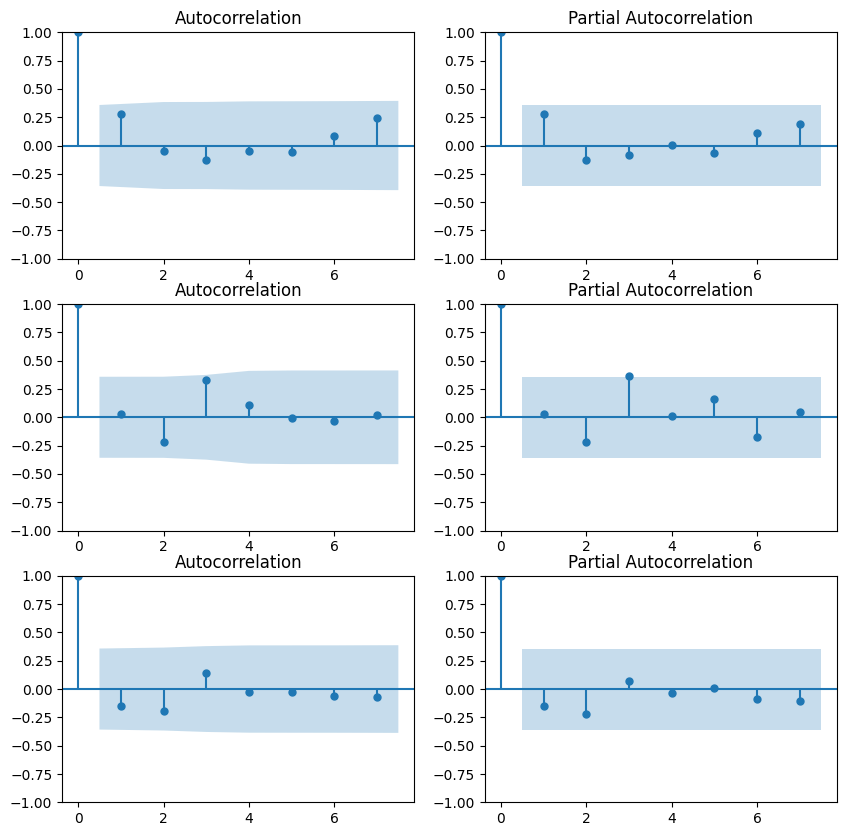

In [28]:
fig, ax = plt.subplots(3, 2, figsize = (10,10))
sm.graphics.tsa.plot_acf(gdp, lags=7, ax=ax[0, 0])
sm.graphics.tsa.plot_pacf(gdp, lags=7, ax=ax[0, 1])
sm.graphics.tsa.plot_acf(co2, lags=7, ax=ax[1, 0])
sm.graphics.tsa.plot_pacf(co2, lags=7, ax=ax[1, 1])
sm.graphics.tsa.plot_acf(gini, lags=7, ax=ax[2, 0])
sm.graphics.tsa.plot_pacf(gini, lags=7, ax=ax[2, 1])
plt.show()

<h1>Auto ARIMA, Forecasts, LJ Test, MSE, MAE, MAPE

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,0,1)[7] intercept   : AIC=-129.226, Time=0.47 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=-131.106, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=-129.442, Time=0.14 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=-131.848, Time=0.24 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=-131.862, Time=0.02 sec
 ARIMA(0,0,0)(1,0,0)[7] intercept   : AIC=-130.708, Time=0.08 sec
 ARIMA(0,0,0)(0,0,1)[7] intercept   : AIC=-132.484, Time=0.10 sec
 ARIMA(0,0,0)(1,0,1)[7] intercept   : AIC=-130.489, Time=0.20 sec
 ARIMA(0,0,0)(0,0,2)[7] intercept   : AIC=-130.500, Time=0.20 sec
 ARIMA(0,0,0)(1,0,2)[7] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(1,0,0)(0,0,1)[7] intercept   : AIC=-130.956, Time=0.15 sec
 ARIMA(1,0,1)(0,0,1)[7] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(0,0,0)(0,0,1)[7]             : AIC=-131.750, Time=0.08 sec

Best model:  ARIMA(0,0,0)(0,0,1)[7] intercept
Total fit time: 2.264 seconds
                                

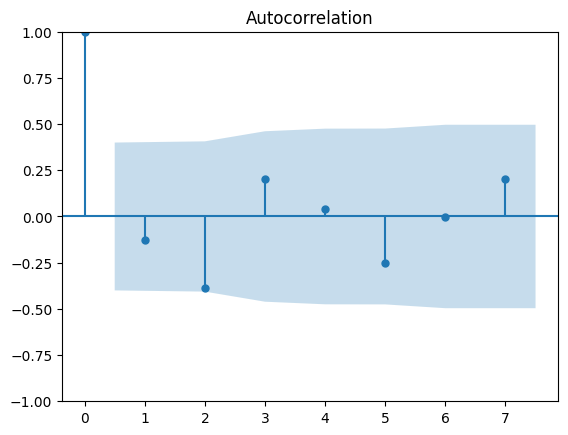

    lb_stat  lb_pvalue
7  9.449108   0.221999


//////////////////////////////////////////////////////////
Forecasts:
 24    0.003953
25    0.012365
26    0.010944
27   -0.003549
28    0.004443
29    0.005613
dtype: float64
Actual values:
 42   -0.007255
43   -0.002430
44    0.002430
45    0.004843
46    0.002413
47   -0.044342
Name: gini, dtype: float64


//////////////////////////////////////////////////////////
RMSE: 0.022
MAE: 0.016
MAPE: 2.473


c:\Users\frank\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\frank\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [30]:
train, test = train_test_split(gini, test_size=0.2, shuffle=False)
# Find the optimal ARIMA model for the train set
model = auto_arima(train, start_p=1, start_q=1, max_p=3, max_q=3, m=7, seasonal=True, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)
print(model.summary())

print('\n\n//////////////////////////////////////////////////////////')
# Check the residuals
residuals = model.resid()
sm.graphics.tsa.plot_acf(residuals, lags=7)  # adjust the number of lags here
plt.show()
lj = sm.stats.acorr_ljungbox(residuals, lags=[7], return_df=True)
print(lj)

print('\n\n//////////////////////////////////////////////////////////')
start = test.index[0]
end = test.index[-1]
forecasts = model.predict(n_periods=len(test), start=start, end=end)
print('Forecasts:\n', forecasts)
print('Actual values:\n', test)

print('\n\n//////////////////////////////////////////////////////////')
# Calculate the error metrics
rmse = np.sqrt(mean_squared_error(test, forecasts))
mae = mean_absolute_error(test, forecasts)
mape = mean_absolute_percentage_error(test, forecasts)
print('RMSE: %.3f' % rmse)
print('MAE: %.3f' % mae)
print('MAPE: %.3f' % mape)

<h1>OLS

In [17]:
df['gdp_squared'] = df['gdp']**2
formula = 'gini ~ gdp + gdp_squared'
model = smf.ols(formula, data=df)
ols = model.fit()

print(ols.summary())


                            OLS Regression Results                            
Dep. Variable:                   gini   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     27.80
Date:                Mon, 08 Jan 2024   Prob (F-statistic):           2.24e-07
Time:                        19:49:18   Log-Likelihood:                 91.574
No. Observations:                  31   AIC:                            -177.1
Df Residuals:                      28   BIC:                            -172.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -6.6107      3.273     -2.020      

In [18]:
df['gdp_squared'] = df['gdp']**2
formula = 'co2 ~ gdp + gdp_squared'
model = smf.ols(formula, data=df)
ols = model.fit()

print(ols.summary())


                            OLS Regression Results                            
Dep. Variable:                    co2   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     133.4
Date:                Mon, 08 Jan 2024   Prob (F-statistic):           4.86e-15
Time:                        19:49:18   Log-Likelihood:                 58.101
No. Observations:                  31   AIC:                            -110.2
Df Residuals:                      28   BIC:                            -105.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -81.1780      9.636     -8.425      